**IMPORTING LIBRARIES**

In [38]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**LOAD DATASET**

In [39]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('Binance_BTCUSDT_d(12_2017_12_2022).csv')

In [40]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1840
Total number of fields present in the dataset:  9


In [41]:
maindf.shape

(1840, 9)

In [42]:
maindf.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2017-12-18,BTC/USDT,18860.04,19300.00,17029.98,18856.25,10624.63307,196339245.7,91956
1,2017-12-19,BTC/USDT,18856.25,18950.00,16300.00,17295.20,13210.74822,232790625.9,116569
2,2017-12-20,BTC/USDT,17295.20,17720.35,14777.66,16488.98,13450.49669,221193892.5,129762
3,2017-12-21,BTC/USDT,16480.52,17309.50,14022.00,15492.64,20324.21730,320176825.3,117731
4,2017-12-22,BTC/USDT,15514.03,15699.34,10961.00,13326.61,36076.27118,477509934.7,243261


In [43]:
maindf.tail()

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1835,2022-12-27,BTC/USDT,16919.39,16972.83,16592.37,16706.36,173749.5862,2.918380e+09,5047628
1836,2022-12-28,BTC/USDT,16706.06,16785.19,16465.33,16547.31,193037.5658,3.210894e+09,5465468
1837,2022-12-29,BTC/USDT,16547.32,16664.41,16488.91,16633.47,160998.4716,2.671666e+09,4553877
1838,2022-12-30,BTC/USDT,16633.47,16677.35,16333.00,16607.48,164916.3117,2.726831e+09,4310415
1839,2022-12-31,BTC/USDT,16607.48,16644.09,16470.00,16542.40,114490.4286,1.897048e+09,3344374


In [44]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1840 non-null   object 
 1   symbol       1840 non-null   object 
 2   open         1840 non-null   float64
 3   high         1840 non-null   float64
 4   low          1840 non-null   float64
 5   close        1840 non-null   float64
 6   Volume BTC   1840 non-null   float64
 7   Volume USDT  1840 non-null   float64
 8   tradecount   1840 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 129.5+ KB


In [45]:
maindf.describe()

,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1.840000e+03,1.840000e+03
mean,20274.189179,20831.269913,19626.359288,20272.595603,72439.890976,1.552102e+09,1.304019e+06
std,16921.786548,17393.964164,16375.931848,16922.159221,72279.716954,1.806907e+09,1.624215e+06
min,3211.710000,3276.500000,3156.260000,3211.720000,1521.537318,1.177017e+07,1.241700e+04
25%,7708.970000,7939.485000,7459.680000,7708.970000,33504.786670,2.825812e+08,2.961682e+05
50%,11034.475000,11410.905000,10652.950000,11034.480000,49359.195775,6.707131e+08,7.321885e+05
75%,33527.057500,34725.202500,31965.605000,33532.975000,79893.761678,2.418677e+09,1.570384e+06
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362800,1.475838e+10,1.453060e+07


CHECKING FOR NULL VALUES

In [46]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [47]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [48]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-12-18
Ending Date 2022-12-31


**BUILDING LSTM MODEL**

In [49]:
# Lets First Take all the Close Price 
closedf = maindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1840, 2)


In [50]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Bitcoin'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole Period of Timeframe of Bitcoin Close Price 2017-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [51]:
closedf = closedf[closedf['date'] > '2017-12-17']
close_bitcoin = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1840


In [52]:
closedf

,date,close
0,2017-12-18,18856.25
1,2017-12-19,17295.20
2,2017-12-20,16488.98
3,2017-12-21,15492.64
4,2017-12-22,13326.61
...,...,...
1835,2022-12-27,16706.36
1836,2022-12-28,16547.31
1837,2022-12-29,16633.47
1838,2022-12-30,16607.48


In [53]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Bitcoin'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Normalizing Data

In [54]:
# deleting date column and normalizing using MinMax Scaler

del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1840, 1)


In [55]:
closedf

array([[0.24325191],
       [0.21897963],
       [0.20644397],
       ...,
       [0.2086906 ],
       [0.20828649],
       [0.20727458]])

Slicing data into Training set and Testing set

In [56]:
# we keep the training set as 80% and 20% testing set

training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1472, 1)
test_data:  (368, 1)


Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 30

In [57]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [58]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1441, 30)
y_train:  (1441,)
X_test:  (337, 30)
y_test (337,)


In [59]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1441, 30, 1)
X_test:  (337, 30, 1)


Actual Model Building

In [60]:
model=Sequential()

model.add(LSTM(20, return_sequences=True, input_shape=(X_train.shape[1],1),activation="relu"))
model.add(LSTM(20, return_sequences=False))
model.add(Dense(1, activation='linear'))

model.compile(loss="mean_squared_error",optimizer="adam")

In [61]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
46/46 [==============================] - 6s 39ms/step - loss: 0.0280 - val_loss: 0.0015
Epoch 2/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 3/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 4/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 5/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 6/100
46/46 [==============================] - 1s 27ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 7/100
46/46 [==============================] - 2s 46ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 8/100
46/46 [==============================] - 2s 54ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 9/100
46/46 [==============================] - 2s 39ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 10/100
46/46 [==============================] - 1s 30ms/step - loss: 0.0012 - val_loss: 0.0024

Plotting Loss and Validation Loss

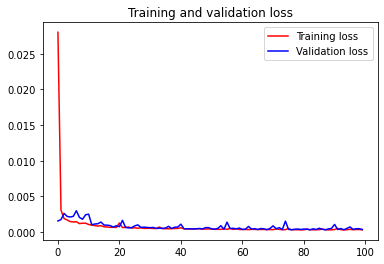

<Figure size 432x288 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [63]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

11/11 [==============================] - 0s 7ms/step


((1441, 1), (337, 1))

Model Evaluation

In [64]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Evaluation Metrices 

Variance Regression Score

In [66]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.99657327455261
Test data explained variance regression score: 0.9877168345327332


R square score for regression

In [67]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9964996909182778
Test data R2 score: 0.9847941066129319


Comparision of original bitcoin close price and predicted close price

In [69]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_bitcoin['date'],
                       'original_close': close_bitcoin['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Bitcoin price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1840, 1)
Test predicted data:  (1840, 1)


Predicting next 30 days

In [70]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 30 days of dataset and next predicted 30 days


In [71]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60]


In [72]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 30 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Bitcoin price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 30 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting entire Closing Bitcoin Price with next 30 days period of prediction

In [73]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(lstmdf,labels={'value': 'Bitcoin Price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting Whole Closing Bitcoin Price With Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Bitcoin')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [74]:
df = pd.DataFrame(lstmdf)
df.to_csv('predicted output.csv')